# Notebook für Exercise 9

In dieser Übung wollen wir die grundlegende Regression behandeln.
Als Beispieldaten verwenden wir Daten von Kraftfahrzeugen.
An diesen Daten soll der Zusammenhang der Kraftstoffeffizienz und verschiedener
Kraftfahrzeugeigenschaften berechnet werden.

In [1]:
## Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from matplotlib import pyplot as plt

Verwenden Sie folgende Url: ['http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data']('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data').

Laden Sie mit der Pandas-Funktion read_csv die Daten.

In [2]:
# Laden der Daten von Url mit Benennung der Spalten
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv( url , names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()
#plt.title('Distribution of stds of all columns');
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


### Aufgabe 1
Bei frei verfügbaren Datensets gibt es oft das Problem, dass Werte in den Spalten fehlen. Damit bei den späteren Berechnungen
keine Fehler entstehen ist es also notwendig die Daten zu bereinigen. Am Einfachsten wirft man unvollständige Daten weg.
Bereinigen Sie die Daten von fehlerhaften Einträgen. Am einfachsten funktioniert dies mit den Methoden  *pandas.DataFrame.dropna()* bzw *.isna()*

In [3]:
dataset=pd.DataFrame.dropna(dataset)

### Aufgabe 2
Oftmals sind in den Daten Werte kategorisch. Es bietet Sich an diese in ein "one-hot" umzuwandeln.
In diesen Daten ist die Herkunft ('Origin') kategorisch. Ordnen Sie die Daten als "one-hot" verschiedenen Spalten zu ('USA'=1 , 'Europe'=2, 'Japan=3').

In [4]:
# Verwandlung von kategorischen Daten und "one-hot"
originOneHot = pd.get_dummies(dataset['Origin'])
#print(originOneHot)
datasetWithoutOrigin=dataset.drop(['Origin'], axis=1)
datasetOneHotEncoded=datasetWithoutOrigin.assign(USA=originOneHot[1], Europe=originOneHot[2], Japan=originOneHot[3])
print(datasetOneHotEncoded)
#Nötig, da sonst Herkunftsländer eine Gewichtung hätten

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  USA  Europe  Japan  
0            70    1       0      0  
1            70    1       0      0  
2            70    1 

### Aufgabe 3
Nun haben wir die Daten in einer verarbeitbaren Form. Teilen Sie die Daten in ein Trainings- und Testset auf. Gehen Sie dabei randomisiert vor.

In [5]:
# Aufteilen der Daten in Train- und Testset
from sklearn.model_selection import train_test_split

(Xtr, Xte) = train_test_split(datasetOneHotEncoded)
print(Xtr.shape)
print(Xte.shape)
print(Xtr.head())

(294, 10)
(98, 10)
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
260  18.6          6         225.0       110.0  3620.0          18.7   
197  29.0          4          90.0        70.0  1937.0          14.2   
221  17.5          8         305.0       145.0  3880.0          12.5   
113  21.0          6         155.0       107.0  2472.0          14.0   
57   24.0          4         113.0        95.0  2278.0          15.5   

     Model Year  USA  Europe  Japan  
260          78    1       0      0  
197          76    0       1      0  
221          77    1       0      0  
113          73    1       0      0  
57           72    0       0      1  


### Aufgabe 4
Im Allgemeinen verschafft man sich beim Aufbau eines Regressionssystems einen Überblick über die Daten.
Plotten Sie in einer Scattermatrix die Korrellationen der Verschiedenen Daten zueinander, mit Focus auf die Kraftstoffeffizienz ('MPG')
Dies kann mit der Pandas-Funtion plotting.scatter_matrix geschehen. Es sollen 'MPG' , 'Cylinders' , 'Displacement' ,  'Horsepower' zueinander korrelliert werden.

array([[<AxesSubplot:xlabel='MPG', ylabel='MPG'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='MPG'>,
        <AxesSubplot:xlabel='Displacement', ylabel='MPG'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='MPG'>],
       [<AxesSubplot:xlabel='MPG', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Displacement', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='Cylinders'>],
       [<AxesSubplot:xlabel='MPG', ylabel='Displacement'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='Displacement'>,
        <AxesSubplot:xlabel='Displacement', ylabel='Displacement'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='Displacement'>],
       [<AxesSubplot:xlabel='MPG', ylabel='Horsepower'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='Horsepower'>,
        <AxesSubplot:xlabel='Displacement', ylabel='Horsepower'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='Horsepower'>]],
      dtype=object)

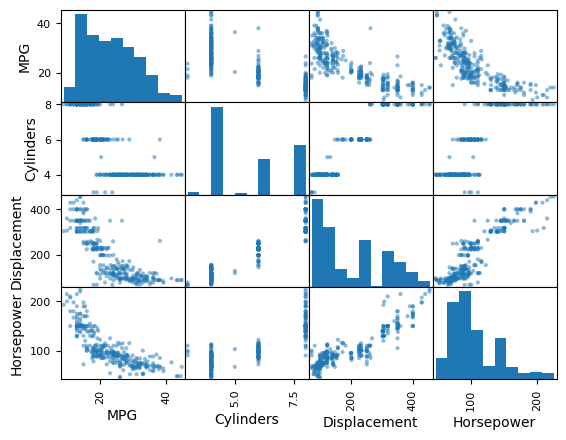

In [6]:
df = pd.DataFrame(Xtr, columns=['MPG', 'Cylinders', 'Displacement', 'Horsepower'])
pd.plotting.scatter_matrix(df)

In [7]:
# Anzeigen der Statistik
Xtr.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,23.217687,5.523810,197.705782,104.411565,2995.309524,15.517687,75.782313,0.642857,0.156463,0.200680
std,7.678988,1.740242,105.944103,37.876267,869.111878,2.713503,3.658674,0.479974,0.363913,0.401192
min,9.000000,3.000000,70.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2236.750000,14.000000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,95.000000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.950000,8.000000,302.000000,129.750000,3670.000000,17.000000,79.000000,1.000000,0.000000,0.000000
max,44.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


### Aufgabe 5
Wenn wir eine Regression berechnen wollen müssen wir den Zielwert von den Daten trennen. Trennen Sie den Zielwert ('MPG') von den Daten.

In [8]:
ytr = Xtr['MPG']
print(ytr)
Xtr = Xtr.drop('MPG', axis=1)
Xtr.describe()

260    18.6
197    29.0
221    17.5
113    21.0
57     24.0
       ... 
231    15.5
238    33.5
313    28.0
361    25.4
357    32.9
Name: MPG, Length: 294, dtype: float64


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,5.523810,197.705782,104.411565,2995.309524,15.517687,75.782313,0.642857,0.156463,0.200680
std,1.740242,105.944103,37.876267,869.111878,2.713503,3.658674,0.479974,0.363913,0.401192
min,3.000000,70.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.000000,75.000000,2236.750000,14.000000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,151.000000,95.000000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,8.000000,302.000000,129.750000,3670.000000,17.000000,79.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,225.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [9]:
yte = Xte['MPG']
print(yte)
Xte = Xte.drop('MPG', axis=1)
Xte.describe()

42     12.0
267    27.5
180    25.0
281    19.8
50     28.0
       ... 
3      16.0
154    15.0
381    36.0
249    19.9
277    16.2
Name: MPG, Length: 98, dtype: float64


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,5.316327,184.530612,104.642857,2924.408163,15.612245,76.571429,0.571429,0.224490,0.204082
std,1.596368,100.522265,40.480172,789.178665,2.903935,3.714002,0.497416,0.419391,0.405101
min,4.000000,68.000000,49.000000,1825.000000,8.500000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,105.000000,76.000000,2216.000000,13.525000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,142.500000,90.000000,2815.000000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,6.000000,250.000000,120.000000,3430.250000,17.700000,80.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,230.000000,4955.000000,24.600000,82.000000,1.000000,1.000000,1.000000


### Aufgabe 6
Die Daten in den verschiedenen Spalten sind sehr unterschiedlich skalliert. Während die Herkunftswerte nur 0 und 1 annehmen sind die Gewichtswert meist über 1000.
Dies misst den verschiedenen Werten somit unterschiedliche Gewichtungen zu. Um dies zu vermeiden werden die Werte normalisiert, auf das Intervall zwischen '0' und '1'.
Normalisieren Sie die Werte. Dazu finden Sie in `preprocessing` eine passende Funktion.

In [19]:
"""def normData(Xtr):
    norm = preprocessing.Normalization(axis=None)
    norm.adapt(Xtr)
    XtrNorm=norm(Xtr)
    #print(XtrNorm)
    XtrNorm = (XtrNorm + 1)/2 #Normalization layer normalizes only on a scale [-1,1]. To get this to [0,1] adjust the values as seen
    #print(XtrNorm)
    XtrNormDataframe = pd.DataFrame(XtrNorm, columns=['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'USA', 'Europe', 'Japan'])
    #print(XtrNormDataframe)
    return XtrNormDataframe"""

### Aufgabe 7
Nun sind die Daten bereit für eine Regressionsanalyse.

Verwenden wir zunächst nur einen Wert und berechnen eine Lineare Regression. Wir setzen 'MPG' und 'Horsepower' in Beziehung.
Extrahieren Sie 'Horsepower' aus den Trainingsdaten, normalisieren sie die Daten und bauen Sie ein einfaches lineares System (neuronales Netz mit einem Knoten zur Regressionsanalyse) auf und trainieren Sie dieses.

In [10]:
HorsepowerTr=np.array(Xtr['Horsepower'])
print(HorsepowerTr)
horsepowerNorm = preprocessing.Normalization(input_shape=[1,], axis=None)
horsepowerNorm.adapt(HorsepowerTr) #Creating Nomralizing layer

hpModel = tf.keras.Sequential([horsepowerNorm, layers.Dense(units=1)])
hpModel.summary()

hpModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                loss="mean_absolute_error")


[110.  70. 145. 107.  95.  95. 105.  65.  68. 150. 150. 150.  85. 153.
  67.  88.  74.  75. 100. 153.  97.  88. 198. 135. 175. 170.  75.  75.
  84. 100. 175.  71. 140.  70.  80. 105.  87. 200.  67. 105.  78. 170.
  90. 150. 150. 150. 165. 105. 140.  75.  97.  90.  67. 148.  88. 150.
  75.  67.  69. 150.  95.  60.  91.  86. 110. 145.  90. 100. 150.  52.
  95.  78.  85. 100. 215.  75.  70. 150. 110.  58.  97.  78. 220.  97.
  60.  90.  46.  48.  88.  88.  84. 160.  94. 140. 140. 100.  82.  95.
  65.  70.  68. 110.  96. 110.  97.  69.  64.  84.  70.  78. 170.  90.
  70.  71. 145.  58.  80. 155.  90.  63. 103.  67.  81.  86.  92. 100.
 110.  90.  68.  75. 180. 105.  83.  97.  52. 105. 115.  96. 100. 129.
  68.  75.  95.  88.  67.  70. 215.  66.  53. 130. 105.  88. 122. 130.
  72. 100.  72. 180.  90. 225. 150.  72. 150.  65. 145.  88.  90. 139.
 125.  67.  95. 167.  95.  85.  78. 190.  95. 115.  90. 112.  95.  92.
 110.  85.  85. 130.  65.  75.  88.  95.  67. 150.  80.  86. 125. 198.
 150. 

In [11]:
learnHis=hpModel.fit(HorsepowerTr, ytr, epochs=100, validation_split = 0.2)
#Loss geht runter ist gut. Accuracy hier schwer/nicht anzeigbar, weil kein Klassifikationsproblem

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 22.8549 - val_loss: 22.6239
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 22.0450 - val_loss: 21.8361
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 21.2466 - val_loss: 21.0485
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 20.4452 - val_loss: 20.2560
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 19.6447 - val_loss: 19.4629
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 18.8374 - val_loss: 18.6675
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 18.0366 - val_loss: 17.8690
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 17.2377 - val_loss: 17.0739
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 16.4374 - val_loss: 16.2715
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 15.6361 - val_loss: 15.4728
Epoch 1

In [12]:
def plot_lossAndValLoss(learnHis):
    plt.plot(learnHis.history['loss'], label='loss')
    plt.plot(learnHis.history['val_loss'], label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    

### Aufgabe 8
Zeigen Sie nun wie gut das lineare System auf die Daten fittet. Plotten Sie die Daten und das lineare Ergebnis.

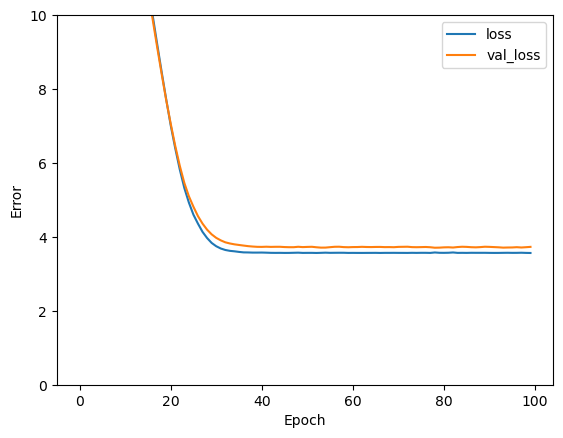

In [13]:
plot_lossAndValLoss(learnHis)

10/10 [==============================] - 0s 777us/step


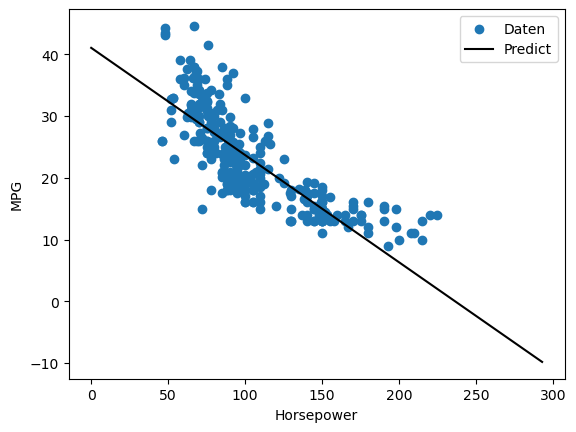

In [14]:
plt.scatter(HorsepowerTr, ytr, label='Daten')
plt.plot(tf.linspace(0.0, 293, 294), hpModel.predict(tf.linspace(0.0, 293, 294)), color='black', label='Predict')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

### Aufgabe 9
Nun versuchen wir die Daten nichtlinear zu fitten. Dazu benötigen wir ein nichlineares System, also ein mehrschichtiges Neuronales Netz.

Erstellen Sie für die 'MPG','Horsepower'-Daten ein DNN und Plotten Sie die Daten wieder.

In [16]:
hpModel = tf.keras.Sequential([horsepowerNorm, layers.Dense(256, activation='relu'), layers.Dense(units=1)])
hpModel.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

In [18]:
hpPolyHis=hpModel.fit(HorsepowerTr, ytr, validation_split=0.2, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 14ms/step - loss: 23.1126 - val_loss: 23.2131
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 22.8988 - val_loss: 23.0126
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 22.6937 - val_loss: 22.8064
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 22.4758 - val_loss: 22.5883
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 22.2478 - val_loss: 22.3487
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 21.9936 - val_loss: 22.0850
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 21.7145 - val_loss: 21.7895
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 21.4033 - val_loss: 21.4558
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 21.0535 - val_loss: 21.0828
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 20.6617 - val_loss: 20.6691
Epoch 11

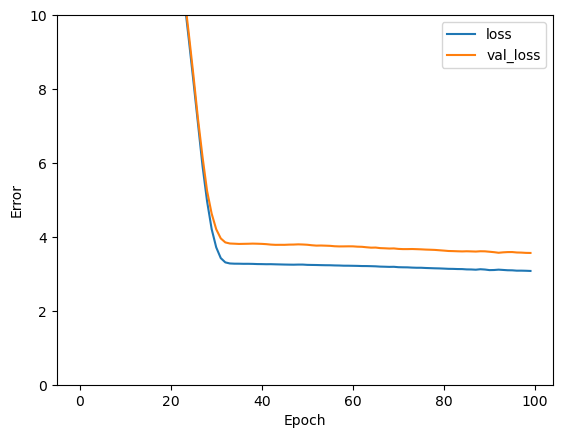

In [19]:
plot_lossAndValLoss(hpPolyHis)

10/10 [==============================] - 0s 776us/step


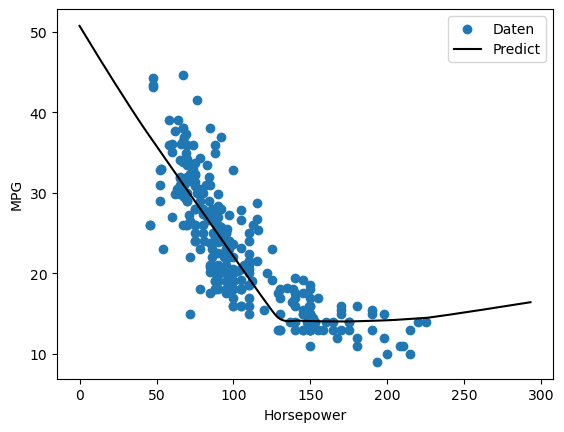

In [ ]:
plt.scatter(HorsepowerTr, ytr, label='Daten')
plt.plot(tf.linspace(0.0, 293, 294), hpModel.predict(tf.linspace(0.0, 293, 294)), color='black', label='Predict')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

### Aufgabe 10
Nun wollen wir alle Daten unseres Datensets miteinbeziehen und sehen ob wir den Fehler nicht noch verkleinern können.
Bauen Sie also ein DNN das alle Daten verwendet, trainieren Sie es und ploten Sie den Verlauf Validierungsfehlers und des Trainingsfehlers.

In [24]:
Norm = preprocessing.Normalization(input_shape=[9,], axis=None)
Norm.adapt(Xtr)

model = tf.keras.Sequential([Norm, layers.Dense(256, activation='relu'), layers.Dense(units=1)])
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

PolyHis=model.fit(Xtr, ytr, validation_split=0.2, epochs=100)

Epoch 1/100
8/8 [==============================] - 0s 17ms/step - loss: 22.8183 - val_loss: 22.5868
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 22.0606 - val_loss: 21.8152
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 21.2810 - val_loss: 20.9984
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 20.4479 - val_loss: 20.1217
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 19.5401 - val_loss: 19.1624
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 18.5432 - val_loss: 18.0940
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 17.4300 - val_loss: 16.9013
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 16.1920 - val_loss: 15.6168
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 14.8299 - val_loss: 14.2728
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 13.4444 - val_loss: 12.9758
Epoch 11

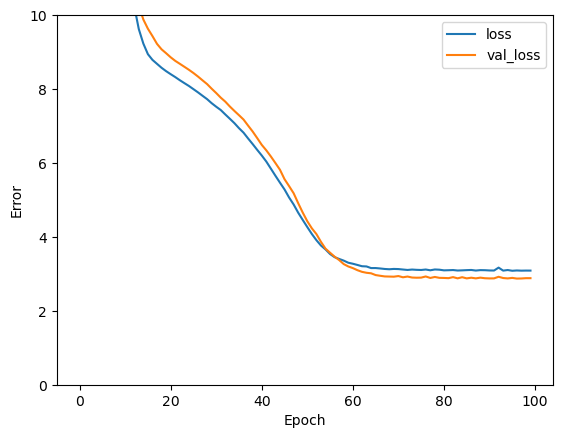

In [25]:
plot_lossAndValLoss(PolyHis)

Epoch 1/100
3/3 [==============================] - 0s 25ms/step - loss: 3.8061 - val_loss: 3.1896
Epoch 2/100
3/3 [==============================] - 0s 12ms/step - loss: 3.8057 - val_loss: 3.1951
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 3.8111 - val_loss: 3.2096
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 3.8066 - val_loss: 3.2016
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 3.8042 - val_loss: 3.2023
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 3.8076 - val_loss: 3.1915
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 3.8061 - val_loss: 3.1848
Epoch 8/100
3/3 [==============================] - 0s 11ms/step - loss: 3.8048 - val_loss: 3.1957
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: 3.8107 - val_loss: 3.2165
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 3.8046 - val_loss: 3.2086
Epoch 11/100
3/3 [=

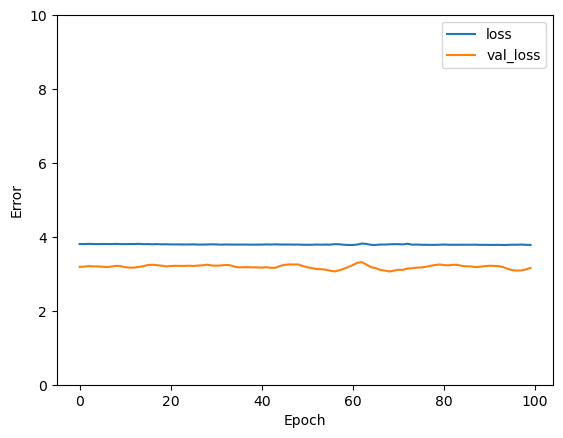

In [26]:
PolyHiste=model.fit(Xte, yte, validation_split=0.2, epochs=100)
plot_lossAndValLoss(PolyHiste)

Versuchen Sie nun mit verschiedenen Optimierern die Netze zu trainieren.
Stellen Sie die Ergebnisse zum Vergleich in einem Plot von jeweils Trainingsverlust und Validierungsverlust dar.

Epoch 1/100
8/8 [==============================] - 0s 15ms/step - loss: 22.4370 - val_loss: 21.5647
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 20.5304 - val_loss: 19.3384
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 17.9586 - val_loss: 16.1313
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 14.4367 - val_loss: 13.1927
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 11.9934 - val_loss: 12.2999
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 11.0481 - val_loss: 11.7965
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 10.7075 - val_loss: 11.5901
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 10.5578 - val_loss: 11.3577
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 10.4266 - val_loss: 11.2619
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 10.3778 - val_loss: 11.1877
Epoch 11

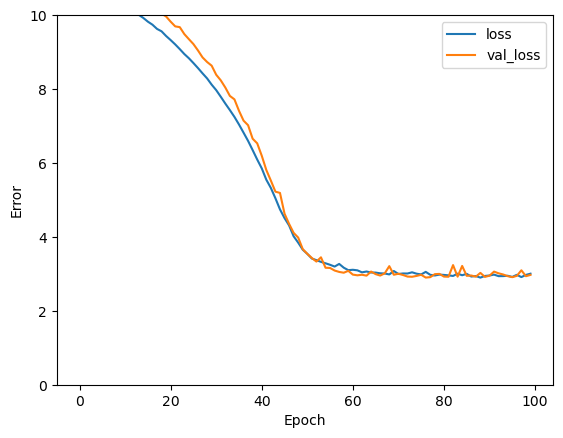

In [31]:
from tensorflow.keras.optimizers import SGD
model = tf.keras.Sequential([Norm, layers.Dense(256, activation='relu'), layers.Dense(units=1)])
opt=SGD(lr=0.01, momentum=0.1)
model.compile(loss='mean_absolute_error', optimizer=opt)

PolyHiste=model.fit(Xtr, ytr, validation_split=0.2, epochs=100)
plot_lossAndValLoss(PolyHiste)


Epoch 1/100
8/8 [==============================] - 0s 14ms/step - loss: 22.9149 - val_loss: 22.9980
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 22.7085 - val_loss: 22.8314
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 22.5563 - val_loss: 22.6933
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 22.4262 - val_loss: 22.5729
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 22.3111 - val_loss: 22.4632
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 22.2054 - val_loss: 22.3615
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 22.1069 - val_loss: 22.2659
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 22.0140 - val_loss: 22.1754
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 21.9257 - val_loss: 22.0890
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 21.8412 - val_loss: 22.0057
Epoch 11

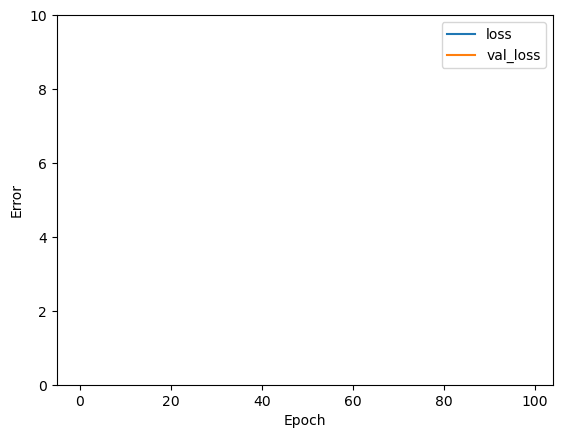

In [33]:

model = tf.keras.Sequential([Norm, layers.Dense(256, activation='relu'), layers.Dense(units=1)])
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adagrad())

PolyHiste=model.fit(Xtr, ytr, validation_split=0.2, epochs=100)
plot_lossAndValLoss(PolyHiste)


Epoch 1/100
8/8 [==============================] - 0s 14ms/step - loss: 22.9405 - val_loss: 22.3473
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 21.7042 - val_loss: 21.3012
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 20.6980 - val_loss: 20.3159
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 19.7151 - val_loss: 19.3163
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 18.7127 - val_loss: 18.2976
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 17.6760 - val_loss: 17.2220
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 16.5781 - val_loss: 16.1034
Epoch 8/100
8/8 [==============================] - 0s 4ms/step - loss: 15.4200 - val_loss: 14.9640
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 14.2463 - val_loss: 13.8816
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 13.0878 - val_loss: 12.8664
Epoch 11

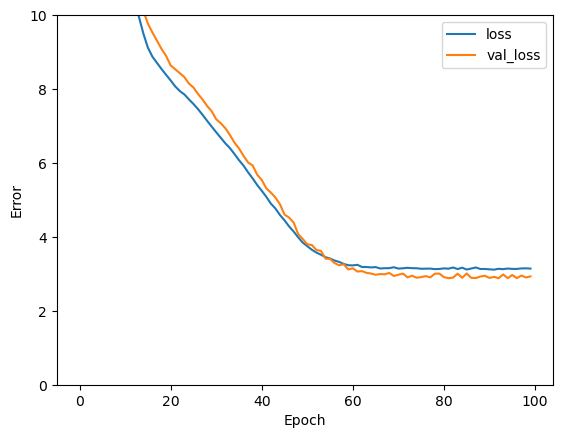

In [36]:
model = tf.keras.Sequential([Norm, layers.Dense(256, activation='relu'), layers.Dense(units=1)])
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.RMSprop())

PolyHiste=model.fit(Xtr, ytr, validation_split=0.2, epochs=100)
plot_lossAndValLoss(PolyHiste)


In [ ]:
#Bei der Bearbeitung der Aufgabe bin ich auf folgende Webseite gestoßen: https://www.tensorflow.org/tutorials/keras/regression . Wer also eine echte Musterlösung haben möchte, kann sich hieran orientieren